# ML Problem: Will a person suffer from human trafficking?

# 1. Libraries & Data Loading

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# data loading
df = pd.read_csv('Data/human_trafficking.csv')
df.head()

C:\Users\vlads\AppData\Local\Temp\ipykernel_16968\276243428.py:2: DtypeWarning: Columns (54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/human_trafficking.csv')


,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
1,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
2,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
3,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1
4,2002,Case Management,Female,18--20,Adult,-99,-99,CO,-99,-99,...,-99,-99,-99,-99,-99,0,0,0,0,1


In [3]:
# -99 are considered mising values (NaN), so we convert them for easier handling
df.replace('-99', np.nan, inplace=True)
df.replace(-99, np.nan, inplace=True)

# 2. EDA

In [4]:
df.shape

(48801, 63)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48801 entries, 0 to 48800
Data columns (total 63 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   yearOfRegistration                      48801 non-null  int64  
 1   Datasource                              48801 non-null  object 
 2   gender                                  48801 non-null  object 
 3   ageBroad                                36439 non-null  object 
 4   majorityStatus                          36439 non-null  object 
 5   majorityStatusAtExploit                 9290 non-null   object 
 6   majorityEntry                           6491 non-null   object 
 7   citizenship                             48523 non-null  object 
 8   meansOfControlDebtBondage               2496 non-null   float64
 9   meansOfControlTakesEarnings             3997 non-null   float64
 10  meansOfControlRestrictsFinancialAccess  253 non-null    fl

In [6]:
df.isnull().sum()

yearOfRegistration                      0
Datasource                              0
gender                                  0
ageBroad                            12362
majorityStatus                      12362
                                    ...  
recruiterRelationIntimatePartner     8807
recruiterRelationFriend              8807
recruiterRelationFamily              8807
recruiterRelationOther               8807
recruiterRelationUnknown               77
Length: 63, dtype: int64

## 2.1 Feature Analysis

### 2.1.0 Time & Source Information

#### yearOfRegistration

In [7]:
print(df[['yearOfRegistration']].info())
print(df['yearOfRegistration'].describe())
print(df[['yearOfRegistration']].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48801 entries, 0 to 48800
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   yearOfRegistration  48801 non-null  int64
dtypes: int64(1)
memory usage: 381.4 KB
None
count    48801.000000
mean      2014.144218
std          4.025566
min       2002.000000
25%       2013.000000
50%       2016.000000
75%       2017.000000
max       2019.000000
Name: yearOfRegistration, dtype: float64
yearOfRegistration    0
dtype: int64


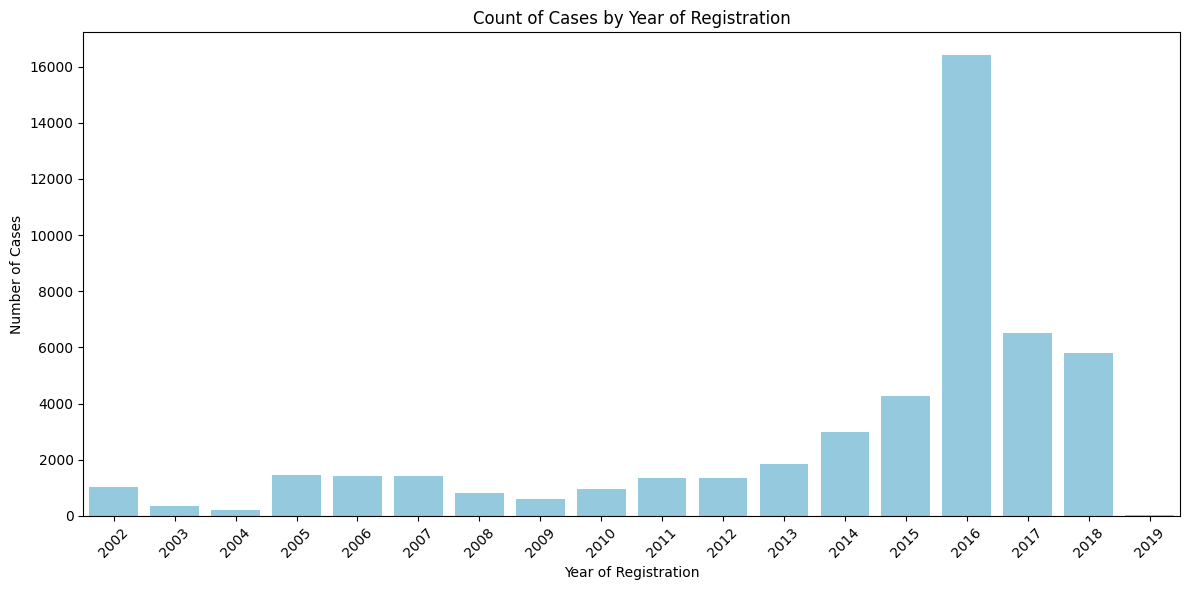

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='yearOfRegistration', color='skyblue') 
plt.title("Count of Cases by Year of Registration")
plt.xlabel("Year of Registration")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Exploitation features to visualize
exploitation_features = [
    'isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour', 
    'isForcedMarriage', 'isForcedMilitary', 'isOrganRemoval', 'isSlaveryAndPractices'
]

# Melt the dataframe to long format
df_melted = df[['yearOfRegistration'] + exploitation_features].melt(id_vars='yearOfRegistration', 
                                                                     var_name='ExploitType', 
                                                                     value_name='Presence')

# Filter rows where Presence is 1 (indicating the presence of the exploit type)
df_melted = df_melted[df_melted['Presence'] == 1]

# Aggregate counts by year and exploit type
df_aggregated = df_melted.groupby(['yearOfRegistration', 'ExploitType']).size().reset_index(name='Count')

# Create an interactive Plotly bar chart
fig = px.bar(df_aggregated, 
             x="yearOfRegistration", 
             y="Count", 
             color="ExploitType", 
             barmode="stack",
             title="Trends in Exploitation Types by Year of Registration",
             labels={"yearOfRegistration": "Year of Registration", "Count": "Number of Cases"},
             height=600)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Year of Registration",
    yaxis_title="Number of Cases",
    xaxis=dict(tickangle=45),
    barmode='stack',  # Stack bars to show the trend for each type of exploitation
)

# Show the plot
fig.show()



In [10]:

# List of recruiter columns
recruiter_cols = [
    'recruiterRelationIntimatePartner', 'recruiterRelationFriend', 
    'recruiterRelationFamily', 'recruiterRelationOther', 'recruiterRelationUnknown'
]

# Group by yearOfRegistration and calculate the mean for each recruiter type
recruiter_trends = df.groupby('yearOfRegistration')[recruiter_cols].mean().reset_index()

# Create an interactive line plot using Plotly
fig = px.line(recruiter_trends, 
              x='yearOfRegistration', 
              y=recruiter_cols, 
              title="Trends in Recruiter Relationship Over Time",
              labels={"yearOfRegistration": "Year of Registration", "value": "Proportion of Cases"},
              line_shape='linear',  # Linear line connection
              markers=True,         # Show markers for each point
              height=600)

# Update layout for better aesthetics and readability
fig.update_layout(
    xaxis_title="Year of Registration",
    yaxis_title="Proportion of Cases",
    xaxis=dict(tickangle=45),
    legend_title="Recruiter Relationship",
    legend=dict(title="Recruiter Relationship", x=1, y=1)
)

# Show the plot
fig.show()


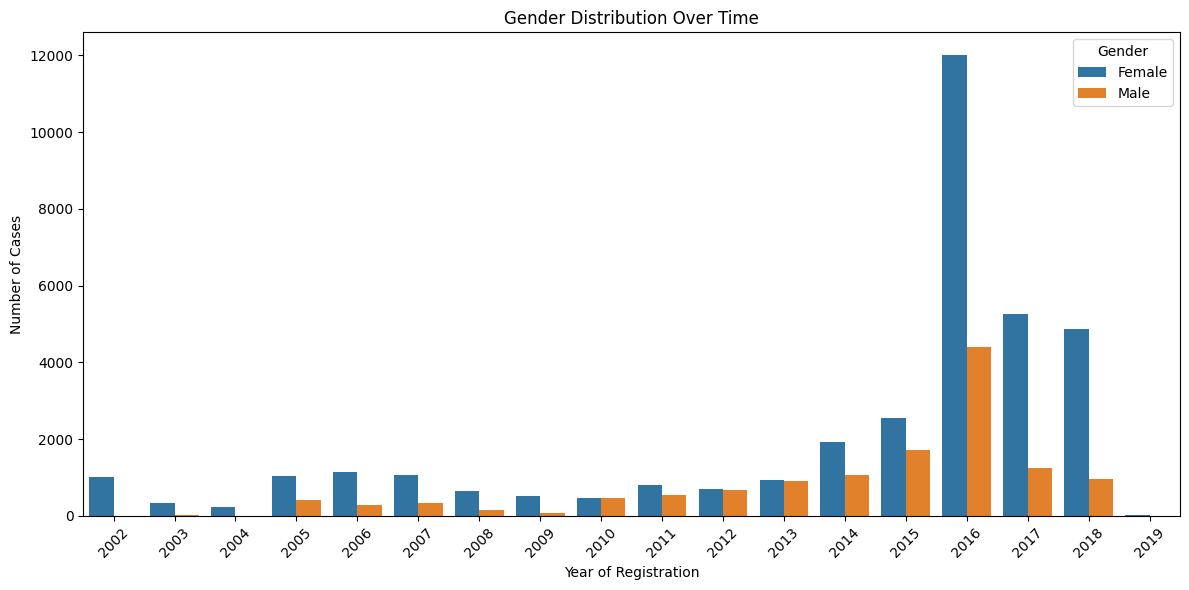

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='yearOfRegistration', hue='gender')
plt.title("Gender Distribution Over Time")
plt.xlabel("Year of Registration")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

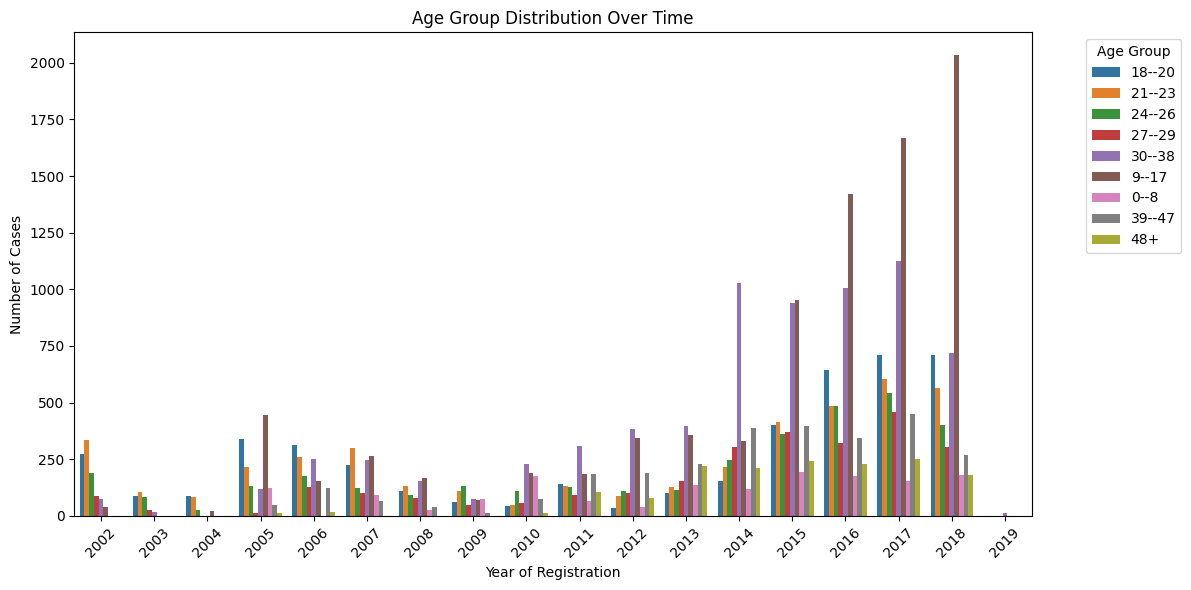

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df.dropna(subset=['ageBroad']), x='yearOfRegistration', hue='ageBroad')
plt.title("Age Group Distribution Over Time")
plt.xlabel("Year of Registration")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


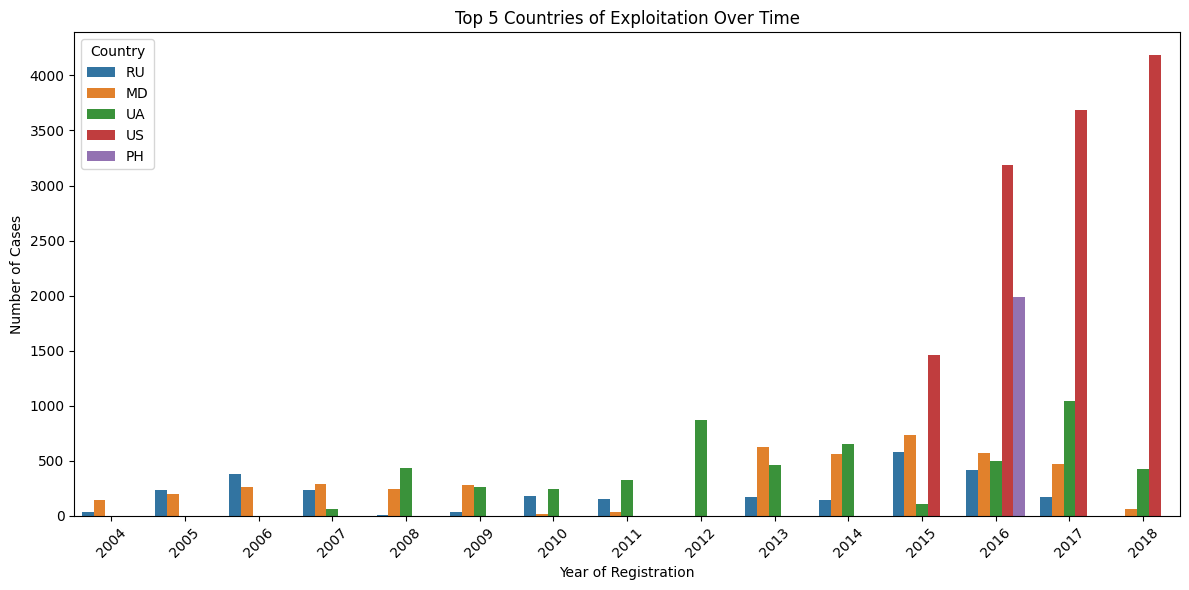

In [13]:
top_countries = df['CountryOfExploitation'].value_counts().head(5).index.tolist()

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['CountryOfExploitation'].isin(top_countries)], 
              x='yearOfRegistration', hue='CountryOfExploitation')
plt.title("Top 5 Countries of Exploitation Over Time")
plt.xlabel("Year of Registration")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.legend(title="Country")
plt.tight_layout()
plt.show()


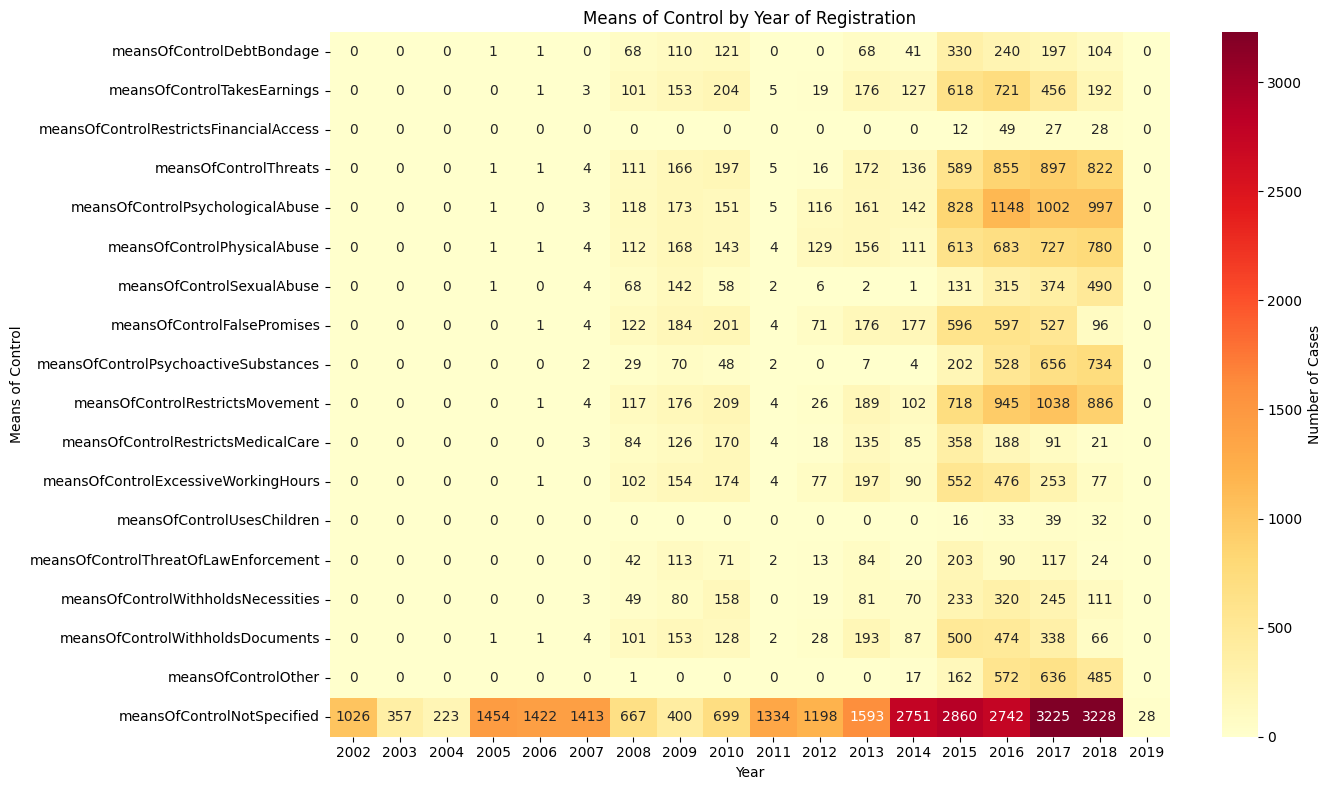

In [14]:
means_of_control_cols = [
    'meansOfControlDebtBondage',
    'meansOfControlTakesEarnings',
    'meansOfControlRestrictsFinancialAccess',
    'meansOfControlThreats',
    'meansOfControlPsychologicalAbuse',
    'meansOfControlPhysicalAbuse',
    'meansOfControlSexualAbuse',
    'meansOfControlFalsePromises',
    'meansOfControlPsychoactiveSubstances',
    'meansOfControlRestrictsMovement',
    'meansOfControlRestrictsMedicalCare',
    'meansOfControlExcessiveWorkingHours',
    'meansOfControlUsesChildren',
    'meansOfControlThreatOfLawEnforcement',
    'meansOfControlWithholdsNecessities',
    'meansOfControlWithholdsDocuments',
    'meansOfControlOther',
    'meansOfControlNotSpecified'
]

# Aggregate
yearly = df.groupby('yearOfRegistration')[means_of_control_cols].sum()

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(yearly.T, annot=True, fmt='g', cmap='YlOrRd', cbar_kws={'label': 'Number of Cases'})
plt.title('Means of Control by Year of Registration')
plt.xlabel('Year')
plt.ylabel('Means of Control')
plt.tight_layout()
plt.show()






##### more detailed code for means of control for each year of registration

In [15]:
# Aggregate
yearly = df.groupby('yearOfRegistration')[means_of_control_cols].sum().reset_index()

# Create traces for each control
fig = go.Figure()

for control in means_of_control_cols:
    fig.add_trace(
        go.Bar(x=yearly['yearOfRegistration'], y=yearly[control], name=control, visible=False)
    )

# Make first one visible
fig.data[0].visible = True

# Dropdown buttons
buttons = []
for i, control in enumerate(means_of_control_cols):
    visible = [False] * len(means_of_control_cols)
    visible[i] = True
    buttons.append(
        dict(label=control,
             method='update',
             args=[{'visible': visible},
                   {'title': f'Means of Control: {control}'}])
    )

# Layout
fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=1.05)],
    title='Means of Control: ' + means_of_control_cols[0],
    xaxis_title='Year of Registration',
    yaxis_title='Number of Cases'
)

fig.show()



#### Datasource

In [16]:
df[['Datasource']].info()
df['Datasource'].value_counts()
df[['Datasource']].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48801 entries, 0 to 48800
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Datasource  48801 non-null  object
dtypes: object(1)
memory usage: 381.4+ KB


Datasource    0
dtype: int64

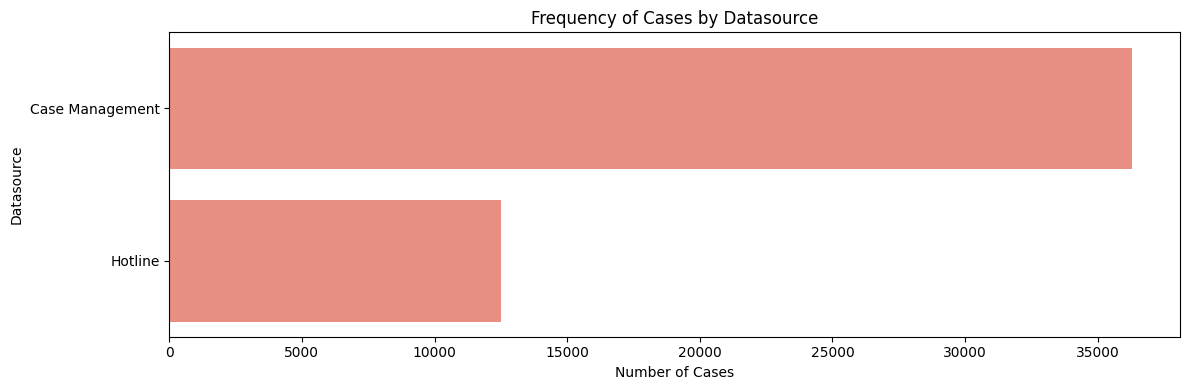

In [17]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, y='Datasource', order=df['Datasource'].value_counts().index, color='salmon')
plt.title("Frequency of Cases by Datasource")
plt.xlabel("Number of Cases")
plt.ylabel("Datasource")
plt.tight_layout()
plt.show()

### 2.1.1 Victim Demographics

### 2.1.2 Type of Exploitation

### 2.1.3 Type of Labour

### 2.1.4 Type of Sexual Exploitation

### 2.1.5 Types of Recuiter Relationship and Country of Exploitation

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

# Optional: Set plotting style
sns.set(style="whitegrid")


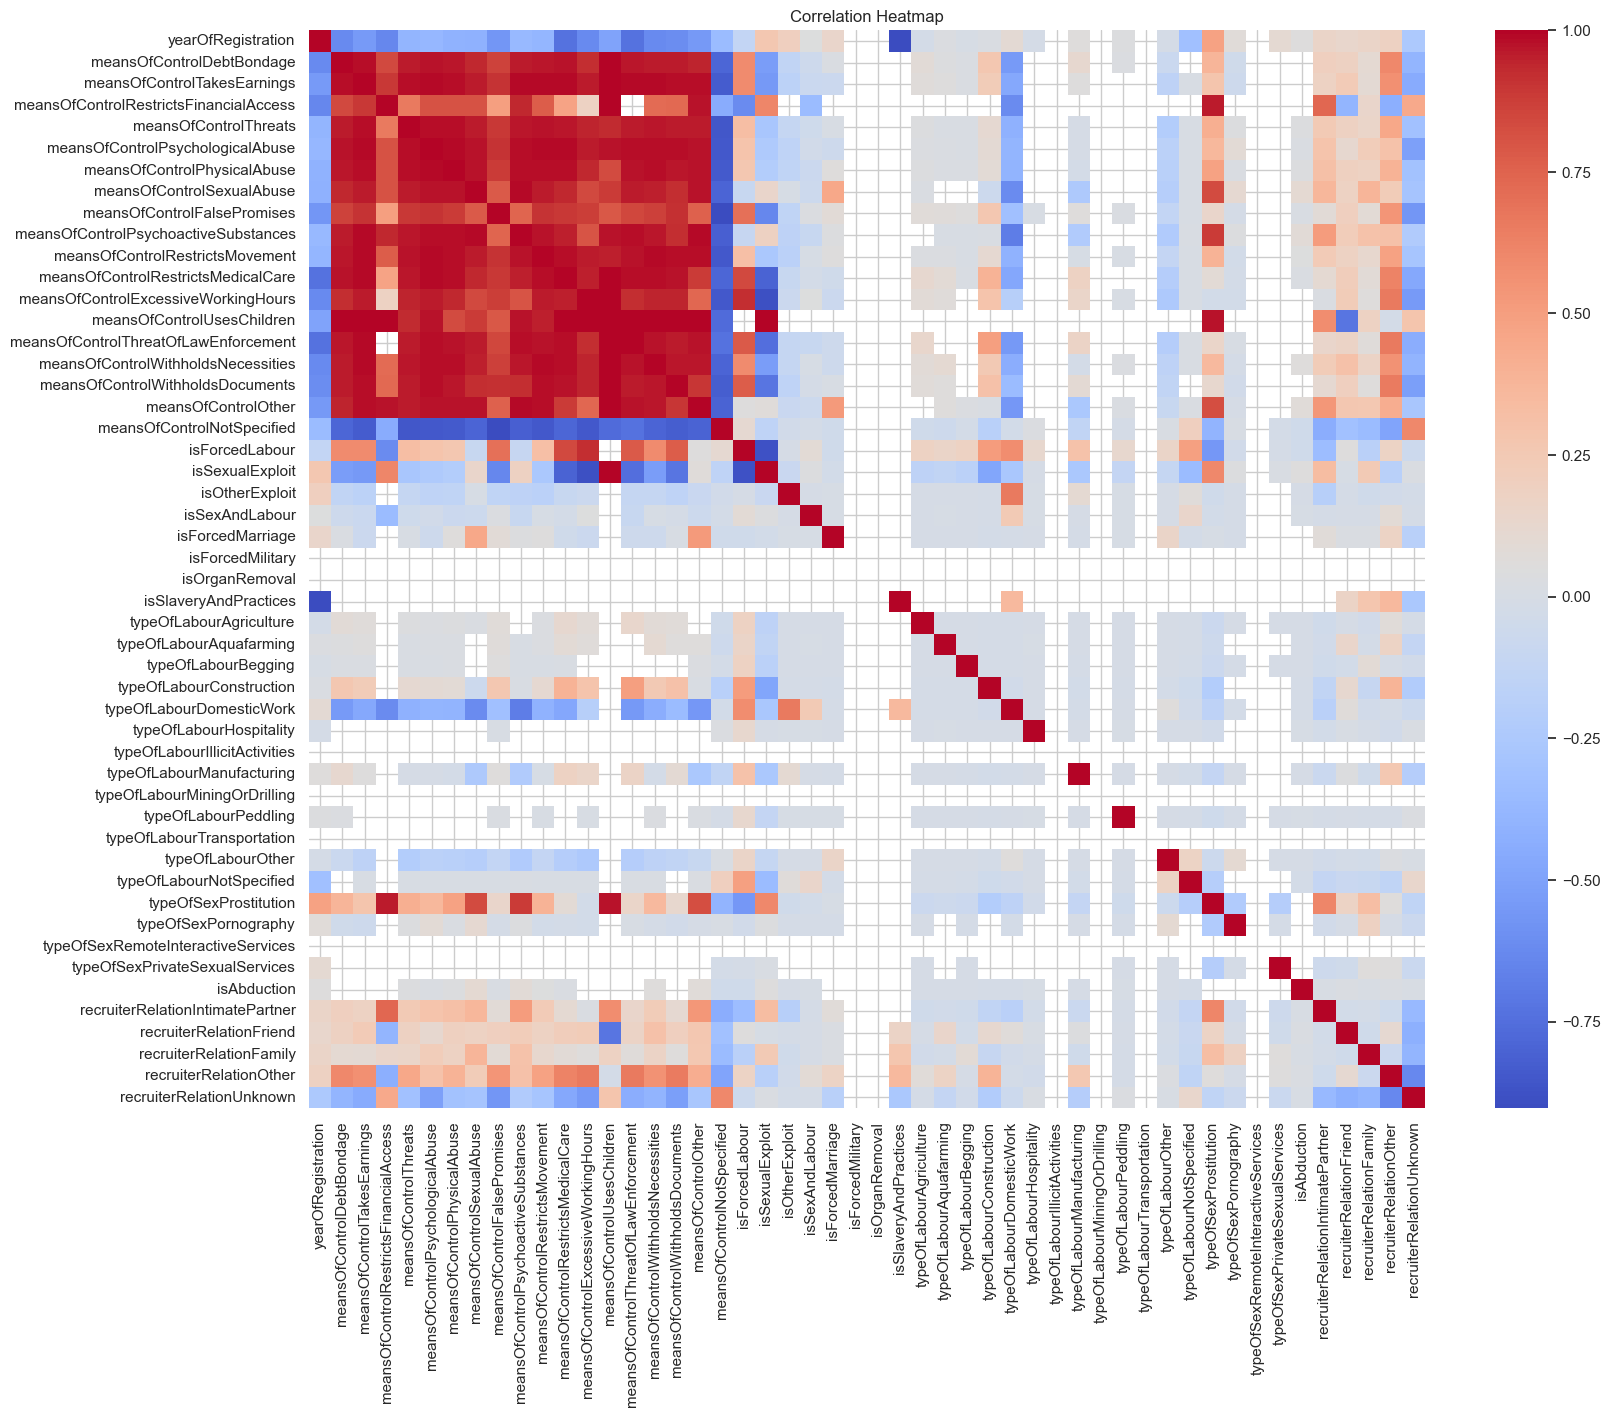

In [19]:
plt.figure(figsize=(18, 14))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


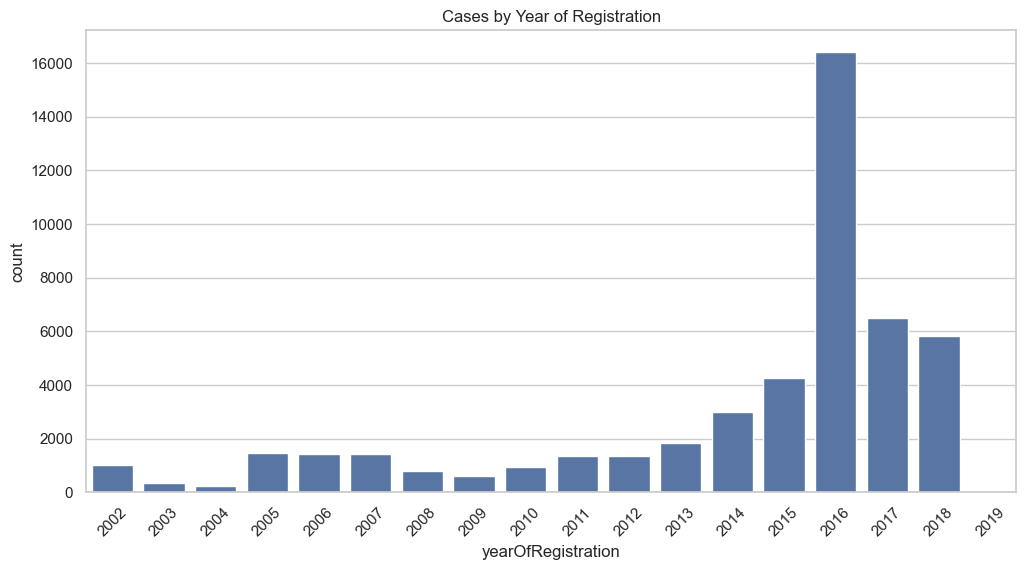

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='yearOfRegistration', data=df, order=sorted(df['yearOfRegistration'].dropna().unique()))
plt.xticks(rotation=45)
plt.title("Cases by Year of Registration")
plt.show()


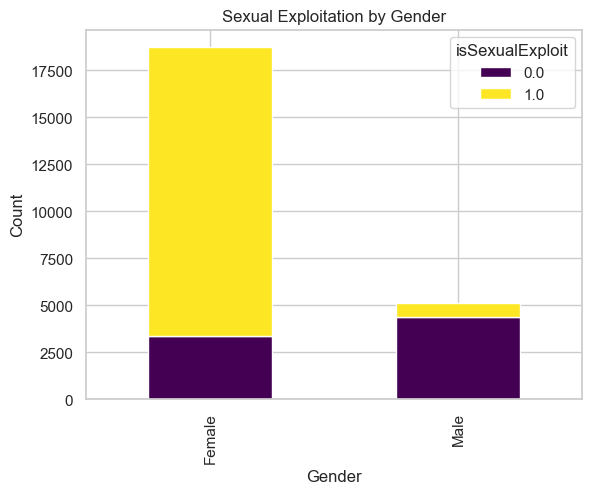

In [21]:
cross_tab = pd.crosstab(df['gender'], df['isSexualExploit'])
cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Sexual Exploitation by Gender")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.legend(title='isSexualExploit')
plt.show()


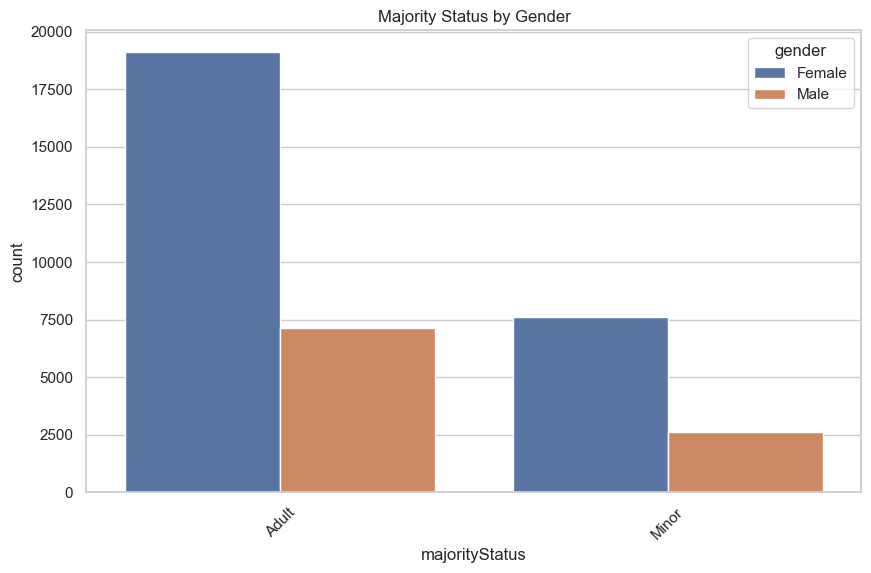

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='majorityStatus', hue='gender')
plt.title("Majority Status by Gender")
plt.xticks(rotation=45)
plt.show()


In [23]:
%pip install pycountry


In [24]:
import pycountry
import plotly.express as px

# Create a mapping from ISO alpha-2 codes to full country names
def code_to_country(code):
    try:
        if pd.isna(code) or code == '00':
            return 'Unknown'
        return pycountry.countries.get(alpha_2=code).name
    except:
        return 'Unknown'

# Apply the mapping
df['citizenship_country'] = df['citizenship'].apply(code_to_country)

# Count occurrences
country_counts = df['citizenship_country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Plot the choropleth map
fig = px.choropleth(country_counts,
                    locations="country",
                    locationmode="country names",
                    color="count",
                    title="Cases by Citizenship Country",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()


In [25]:
country_counts = df['CountryOfExploitation'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

fig = px.choropleth(country_counts,
                    locations="country",
                    locationmode="country names",
                    color="count",
                    title="Exploitation Cases by Country",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()


In [26]:
subset = df[['gender', 'typeOfExploitConcatenated', 'CountryOfExploitation']].dropna().copy()
subset = subset[subset['typeOfExploitConcatenated'] != '']

subset = subset.groupby(['gender', 'typeOfExploitConcatenated', 'CountryOfExploitation']).size().reset_index(name='count')

# Create node list
all_nodes = pd.concat([
    subset['gender'],
    subset['typeOfExploitConcatenated'],
    subset['CountryOfExploitation']
]).unique().tolist()

# Map node labels to index
label_to_idx = {label: idx for idx, label in enumerate(all_nodes)}

# Create links
source = subset['gender'].map(label_to_idx)
target = subset['typeOfExploitConcatenated'].map(label_to_idx)
middle_target = subset['CountryOfExploitation'].map(label_to_idx)

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes
    ),
    link=dict(
        source=source,
        target=target,
        value=subset['count']
    )
)])

fig.update_layout(title_text="Sankey Diagram: Gender → Type of Exploitation", font_size=10)
fig.show()


# 3. Handling Missing Values

C:\Users\vlads\AppData\Local\Temp\ipykernel_16968\3255378421.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




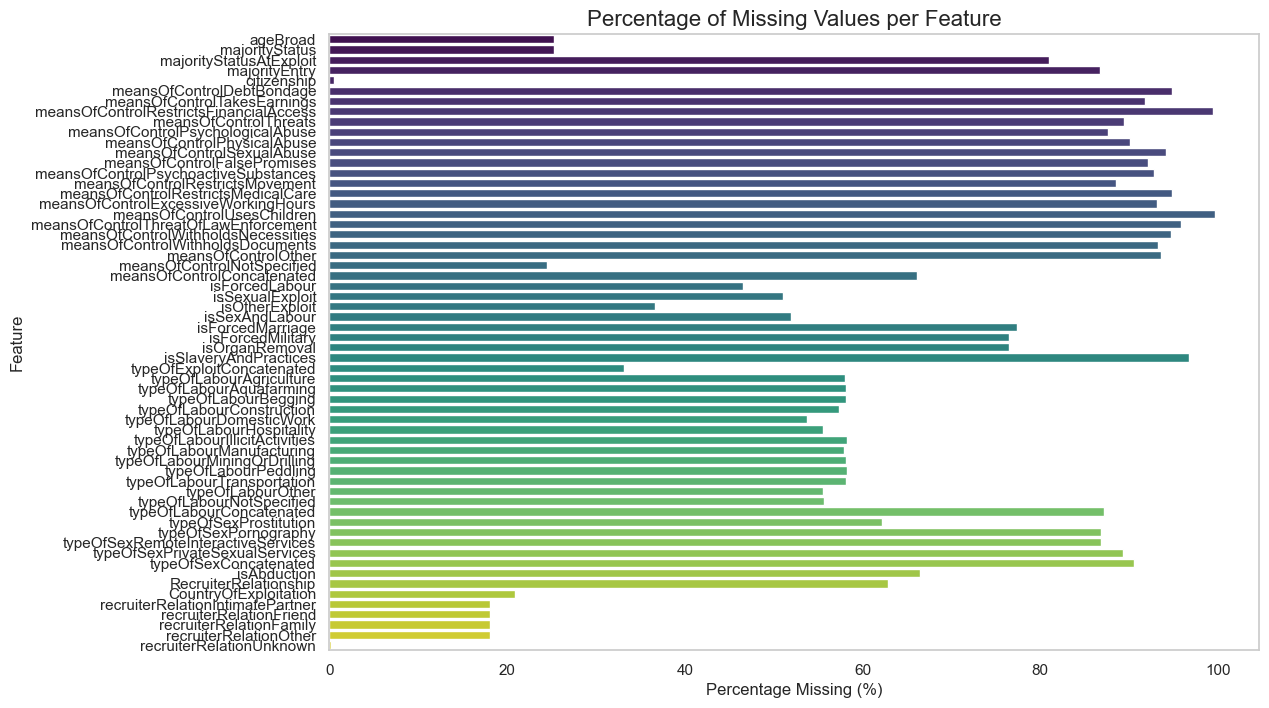

In [27]:
# 1. Calculate missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Keep only columns with missing values
missing_percentage = (missing_values / len(df)) * 100

# 2. Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_percentage.values, y=missing_percentage.index, palette="viridis")
plt.title('Percentage of Missing Values per Feature', fontsize=16)
plt.xlabel('Percentage Missing (%)')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()


#Apporach to be  determined

#Lots of features have a 1 or a 0 or -99 and -99 can be swapped out with 0 if we want


# 4. Outliers

# 5. Data Partitioning (Split)

# 6. Feature Engineering and Scaling

## 6.2 Feature engineering and scaling for unsupervised learning

In [28]:
# 1. Handling Missing Values
X = df.copy()


# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Fill missing values for categorical columns
X[categorical_cols] = X[categorical_cols].fillna('Unknown')  # 'Unknown' for categorical variables

# Fill missing values for numerical columns
X[numerical_cols] = X[numerical_cols].fillna(0)  # 0 for numerical variables (or you could use median/mean)

In [29]:
# 2. Encoding Categorical Variables

# Apply OneHotEncoder for categorical columns to create binary columns
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform categorical columns
X_encoded = ohe.fit_transform(X[categorical_cols])

# Create new column names for the encoded features
encoded_cols = ohe.get_feature_names_out(categorical_cols)

# Convert to DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_cols)

# Drop original categorical columns and concatenate with encoded ones
X = pd.concat([X.drop(columns=categorical_cols), X_encoded_df], axis=1)

In [30]:
# 3. Scaling the Features (Important for Clustering Algorithms)

# Standardize features by scaling the data to have mean=0 and standard deviation=1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling the dataset

In [31]:
# If you wish to reduce dimensionality later (optional), use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reducing to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

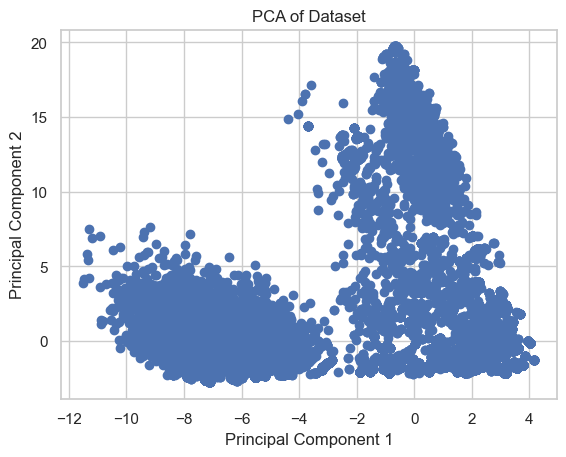

In [32]:
# Optional: Visualize the data after PCA transformation (useful for high-dimensional data)
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA of Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 7. Model Selection

## 7.1 Baseline Model

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Assume X_scaled is your preprocessed data (scaled features)

# Initialize the KMeans model (you can adjust the number of clusters based on your problem)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans model to the scaled data
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Calculate performance metrics
silhouette = silhouette_score(X_scaled, clusters_kmeans)
davies_bouldin = davies_bouldin_score(X_scaled, clusters_kmeans)
calinski_harabasz = calinski_harabasz_score(X_scaled, clusters_kmeans)

# Store results in a dictionary
performance_metrics = {
    "KMeans": {
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": davies_bouldin,
        "Calinski-Harabasz Index": calinski_harabasz
    }
}

# Print the performance metrics for KMeans
print("Performance for KMeans:")
for metric, value in performance_metrics["KMeans"].items():
    print(f"  {metric}: {value:.4f}")


Performance for KMeans:
  Silhouette Score: 0.3203
  Davies-Bouldin Index: 0.4875
  Calinski-Harabasz Index: 43.3854


In [34]:
# Optional: Convert the performance metrics into a DataFrame for easy visualization
import pandas as pd
metrics_df = pd.DataFrame(performance_metrics).T
print(metrics_df)

        Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index
KMeans          0.320324               0.48749                43.385379


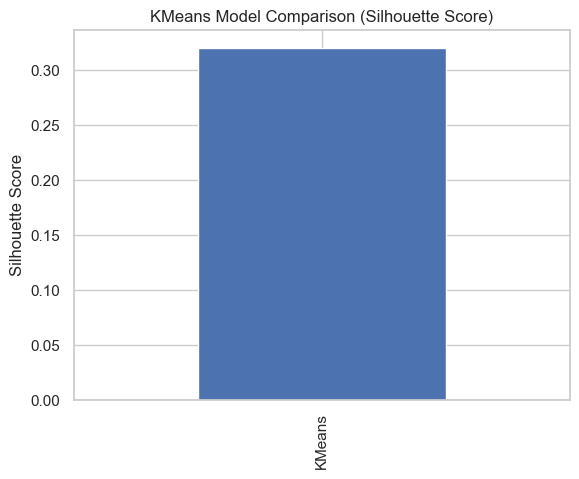

In [35]:
# Now you can optionally plot the Silhouette Score for KMeans
import matplotlib.pyplot as plt
metrics_df['Silhouette Score'].plot(kind='bar', title="KMeans Model Comparison (Silhouette Score)")
plt.ylabel("Silhouette Score")
plt.show()

## 7.2 Model 1

In [36]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Since DBSCAN might label some points as noise (-1), let's ignore them for metric calculations
clusters_dbscan_cleaned = clusters_dbscan[clusters_dbscan != -1]
X_scaled_cleaned = X_scaled[clusters_dbscan != -1]

# Calculate performance metrics
silhouette_dbscan = silhouette_score(X_scaled_cleaned, clusters_dbscan_cleaned)
davies_bouldin_dbscan = davies_bouldin_score(X_scaled_cleaned, clusters_dbscan_cleaned)
calinski_harabasz_dbscan = calinski_harabasz_score(X_scaled_cleaned, clusters_dbscan_cleaned)

# Store results in the dictionary
performance_metrics["DBSCAN"] = {
    "Silhouette Score": silhouette_dbscan,
    "Davies-Bouldin Index": davies_bouldin_dbscan,
    "Calinski-Harabasz Index": calinski_harabasz_dbscan
}

# Print the performance metrics for DBSCAN
print("\nPerformance for DBSCAN:")
for metric, value in performance_metrics["DBSCAN"].items():
    print(f"  {metric}: {value:.4f}")



Performance for DBSCAN:
  Silhouette Score: 0.9290
  Davies-Bouldin Index: 0.0746
  Calinski-Harabasz Index: 102579.5287


## 7.3 Model 2

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Initialize AgglomerativeClustering with cosine affinity
agg_clustering = AgglomerativeClustering(n_clusters=5, affinity='cosine', linkage='average')

# Fit the AgglomerativeClustering model
clusters_agg = agg_clustering.fit_predict(X_pca)

# Calculate performance metrics
silhouette_agg = silhouette_score(X_pca, clusters_agg)
davies_bouldin_agg = davies_bouldin_score(X_pca, clusters_agg)
calinski_harabasz_agg = calinski_harabasz_score(X_pca, clusters_agg)

# Store results in the dictionary
performance_metrics["Agglomerative Clustering"] = {
    "Silhouette Score": silhouette_agg,
    "Davies-Bouldin Index": davies_bouldin_agg,
    "Calinski-Harabasz Index": calinski_harabasz_agg
}

# Print the performance metrics for Agglomerative Clustering
print("\nPerformance for Agglomerative Clustering:")
for metric, value in performance_metrics["Agglomerative Clustering"].items():
    print(f"  {metric}: {value:.4f}")



Performance for Agglomerative Clustering:
  Silhouette Score: -0.1440
  Davies-Bouldin Index: 5.4296
  Calinski-Harabasz Index: 156.4570


## 7.4 Model 3

In [38]:
from sklearn.mixture import GaussianMixture

# Initialize Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=42)

# Fit the GMM model
clusters_gmm = gmm.fit_predict(X_scaled)

# Calculate performance metrics
silhouette_gmm = silhouette_score(X_scaled, clusters_gmm)
davies_bouldin_gmm = davies_bouldin_score(X_scaled, clusters_gmm)
calinski_harabasz_gmm = calinski_harabasz_score(X_scaled, clusters_gmm)

# Store results in the dictionary
performance_metrics["Gaussian Mixture Model"] = {
    "Silhouette Score": silhouette_gmm,
    "Davies-Bouldin Index": davies_bouldin_gmm,
    "Calinski-Harabasz Index": calinski_harabasz_gmm
}

# Print the performance metrics for GMM
print("\nPerformance for Gaussian Mixture Model:")
for metric, value in performance_metrics["Gaussian Mixture Model"].items():
    print(f"  {metric}: {value:.4f}")



Performance for Gaussian Mixture Model:
  Silhouette Score: 0.3203
  Davies-Bouldin Index: 0.4875
  Calinski-Harabasz Index: 43.3854


## 7.5 Model 4

In [39]:
!pip install minisom
!pip install umap

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for minisom: filename=minisom-2.3.5-py3-none-any.whl size=12130 sha256=ee5318796db3d38c0c2386e1207f488380eb4d46e20ba72e306c6502554e53d3
  Stored in directory: c:\users\vlads\appdata\local\pip\cache\wheels\0f\8c\a4\5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for umap: filena

In [40]:
from minisom import MiniSom
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

# Assuming X_scaled is your scaled data
# 7. Self-Organizing Maps (SOM) - Clustering
som = MiniSom(5, 5, X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.train(X_scaled, 10000, verbose=True)

# Extracting SOM labels by finding the winning node for each sample
som_labels = np.array([som.winner(x)[0] * 5 + som.winner(x)[1] for x in X_scaled])

# Performance Metrics
performance_metrics = {}
performance_metrics["Self-Organizing Map"] = {
    "Silhouette Score": silhouette_score(X_scaled, som_labels),
    "Davies-Bouldin Index": davies_bouldin_score(X_scaled, som_labels),
    "Calinski-Harabasz Index": calinski_harabasz_score(X_scaled, som_labels)
}

print(performance_metrics)

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 25.59135818466459
{'Self-Organizing Map': {'Silhouette Score': np.float64(0.4543558075345541), 'Davies-Bouldin Index': np.float64(2.075438437390221), 'Calinski-Harabasz Index': np.float64(28.831671568304174)}}


## Visualizations

In [41]:
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

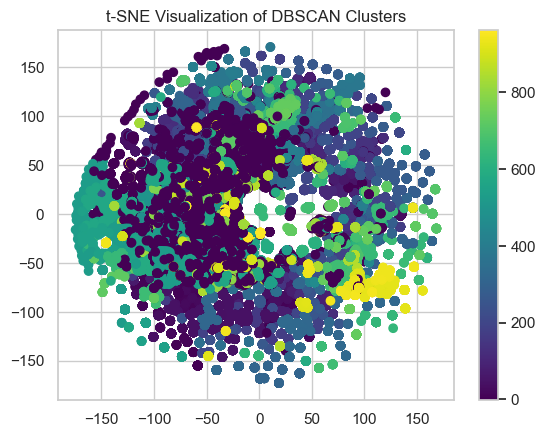

In [42]:
# 5. t-SNE Visualization (not clustering, only for visualization)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_dbscan, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of DBSCAN Clusters')
plt.show()

## Summary

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Combine all results into the performance_metrics dictionary
performance_metrics = {
    "KMeans": {
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": davies_bouldin,
        "Calinski-Harabasz Index": calinski_harabasz
    },
    "DBSCAN": {
        "Silhouette Score": silhouette_dbscan,
        "Davies-Bouldin Index": davies_bouldin_dbscan,
        "Calinski-Harabasz Index": calinski_harabasz_dbscan
    },
    "Agglomerative Clustering": {
        "Silhouette Score": silhouette_agg,
        "Davies-Bouldin Index": davies_bouldin_agg,
        "Calinski-Harabasz Index": calinski_harabasz_agg
    },
    "Gaussian Mixture Model": {
        "Silhouette Score": silhouette_gmm,
        "Davies-Bouldin Index": davies_bouldin_gmm,
        "Calinski-Harabasz Index": calinski_harabasz_gmm
    },
    "Self-Organizing Map": {
        "Silhouette Score": silhouette_score(X_scaled, som_labels),
        "Davies-Bouldin Index": davies_bouldin_score(X_scaled, som_labels),
        "Calinski-Harbasz Index": calinski_harabasz_score(X_scaled, som_labels)
    }
}

# Convert the dictionary into a DataFrame for easy visualization
metrics_df = pd.DataFrame(performance_metrics).T
print("\nPerformance Comparison of Models:")
print(metrics_df)


Performance Comparison of Models:
                          Silhouette Score  Davies-Bouldin Index  \
KMeans                            0.320324              0.487490   
DBSCAN                            0.928993              0.074553   
Agglomerative Clustering         -0.128201              6.703841   
Gaussian Mixture Model            0.320324              0.487490   
Self-Organizing Map               0.454356              2.075438   

                          Calinski-Harabasz Index  Calinski-Harbasz Index  
KMeans                                  43.385379                     NaN  
DBSCAN                              102579.528670                     NaN  
Agglomerative Clustering               196.485438                     NaN  
Gaussian Mixture Model                  43.385379                     NaN  
Self-Organizing Map                           NaN               28.831672  


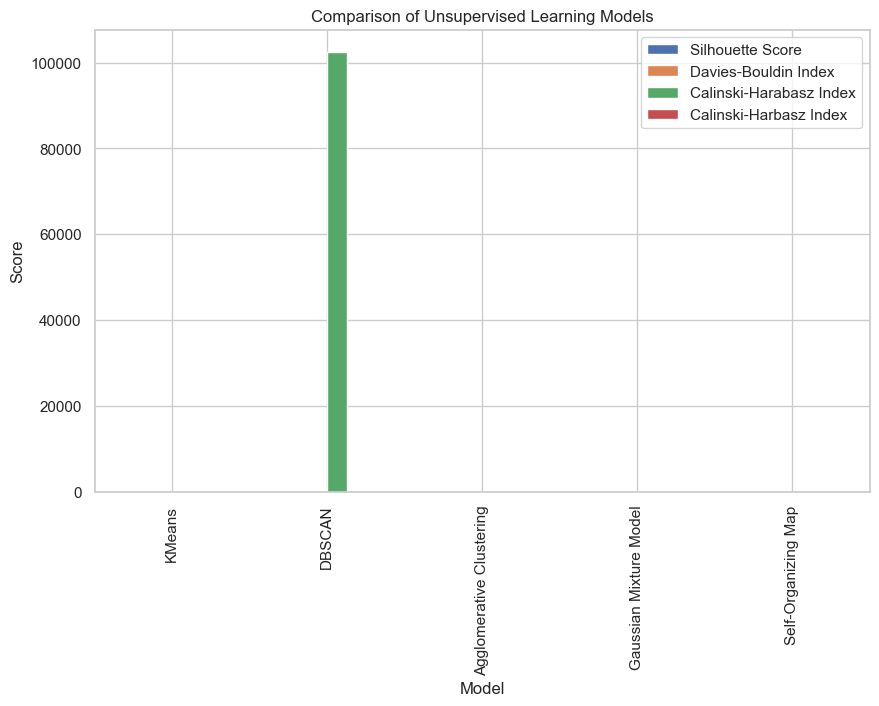

In [44]:
# Plot the performance metrics for comparison
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Comparison of Unsupervised Learning Models")
plt.ylabel("Score")
plt.xlabel("Model")
plt.show()

# 8. Model Evaluation